In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/beer_reviews.csv')

In [3]:
bsdf = df.copy()

In [4]:
bsdf = bsdf.loc[:, ['beer_style', 'review_overall', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste']]

In [5]:
bsdf

,beer_style,review_overall,review_aroma,review_appearance,review_palate,review_taste
0,Hefeweizen,1.5,2.0,2.5,1.5,1.5
1,English Strong Ale,3.0,2.5,3.0,3.0,3.0
2,Foreign / Export Stout,3.0,2.5,3.0,3.0,3.0
3,German Pilsener,3.0,3.0,3.5,2.5,3.0
4,American Double / Imperial IPA,4.0,4.5,4.0,4.0,4.5
...,...,...,...,...,...,...
1586609,Pumpkin Ale,5.0,4.0,3.5,4.0,4.0
1586610,Pumpkin Ale,4.0,5.0,2.5,2.0,4.0
1586611,Pumpkin Ale,4.5,3.5,3.0,3.5,4.0
1586612,Pumpkin Ale,4.0,4.5,4.5,4.5,4.5


In [6]:
bsdf_grouped = bsdf.groupby('beer_style').agg({'beer_style': 'count', 'review_overall': ['std', 'mean'], 'review_aroma': ['std', 'mean'], 'review_appearance': ['std', 'mean'], 'review_palate': ['std', 'mean'], 'review_taste': ['std', 'mean']}).round(2).reset_index()

In [7]:
bsdf_grouped

beer_style        review_overall       review_aroma  \
                                 count            std  mean          std   
0                       Altbier   7741           0.65  3.82         0.58   
1        American Adjunct Lager  30749           0.94  3.00         0.72   
2      American Amber / Red Ale  45751           0.67  3.78         0.62   
3    American Amber / Red Lager   9311           0.76  3.56         0.65   
4           American Barleywine  26728           0.62  3.90         0.52   
..                          ...    ...            ...   ...          ...   
99                 Vienna Lager   8954           0.69  3.76         0.62   
100                  Weizenbock   9412           0.60  4.01         0.52   
101                   Wheatwine   3714           0.65  3.82         0.54   
102               Winter Warmer  20661           0.67  3.70         0.60   
103                     Witbier  30140           0.70  3.78         0.62   

          review_appearance       review_palate       review_taste        
     mean               std  mean           std  mean          std  mean  
0    3.62              0.51  3.81          0.59  3.71         0.63  3.74  
1    2.48              0.74  2.79          0.78  2.74         0.82  2.68  
2    3.63              0.54  3.81          0.61  3.66         0.66  3.70  
3    3.21              0.60  3.53          0.67  3.35         0.70  3.37  
4    4.02              0.48  4.04          0.55  4.00         0.60  4.04  
..    ...               ...   ...           ...   ...          ...   ...  
99   3.43              0.56  3.70          0.62  3.56         0.65  3.60  
100  4.04              0.51  4.01          0.54  3.99         0.58  4.08  
101  3.97              0.48  3.91          0.57  3.94         0.61  3.98  
102  3.71              0.51  3.84          0.61  3.67         0.66  3.72  
103  3.64              0.58  3.69          0.62  3.63         0.67  3.65  

[104 rows x 12 columns]

In [8]:
bsdf_grouped.sort_values(('beer_style', 'count'), ascending=False, inplace=True)

In [9]:
bsdf_grouped

beer_style         review_overall        \
                                       count            std  mean   
12                      American IPA  117586           0.61  3.97   
9     American Double / Imperial IPA   85977           0.64  4.00   
14           American Pale Ale (APA)   63469           0.66  3.85   
89            Russian Imperial Stout   54129           0.64  4.02   
11  American Double / Imperial Stout   50705           0.67  4.03   
..                               ...     ...            ...   ...   
62                              Gose     686           0.62  3.97   
56                              Faro     609           0.76  3.60   
88                        Roggenbier     466           0.53  3.95   
72                             Kvass     297           0.96  3.36   
64                          Happoshu     241           0.99  2.91   

   review_aroma       review_appearance       review_palate        \
            std  mean               std  mean           std  mean   
12         0.59  3.89              0.50  3.97          0.54  3.87   
9          0.57  4.10              0.47  4.08          0.54  4.02   
14         0.61  3.66              0.52  3.78          0.58  3.68   
89         0.54  4.08              0.51  4.21          0.62  4.09   
11         0.57  4.16              0.52  4.16          0.62  4.10   
..          ...   ...               ...   ...           ...   ...   
62         0.51  3.78              0.42  3.91          0.51  3.89   
56         0.62  3.68              0.50  3.75          0.61  3.65   
88         0.46  3.83              0.53  3.82          0.52  3.83   
72         0.73  3.34              0.60  3.48          0.77  3.20   
64         0.76  2.60              0.80  2.93          0.84  2.74   

   review_taste        
            std  mean  
12         0.61  3.92  
9          0.61  4.09  
14         0.64  3.72  
89         0.62  4.15  
11         0.63  4.19  
..          ...   ...  
62         0.60  3.91  
56         0.73  3.63  
88         0.48  3.92  
72         0.84  3.33  
64         0.88  2.66  

[104 rows x 12 columns]

In [10]:
bsdf_grouped.reset_index(inplace=True)

In [11]:
bsdf_t20 = bsdf_grouped.loc[:, [('beer_style', ''), ('beer_style','count'), ('review_overall', 'mean'), ('review_overall', 'std')]]

In [12]:
bsdf_t20.columns = bsdf_t20.columns.droplevel()

In [13]:
bsdf_t20.columns = ['beer_style', 'beer_style_review_count', 'review_overall_mean', 'review_overall_std']

In [14]:
bsdf_t20

,beer_style,beer_style_review_count,review_overall_mean,review_overall_std
0,American IPA,117586,3.97,0.61
1,American Double / Imperial IPA,85977,4.00,0.64
2,American Pale Ale (APA),63469,3.85,0.66
3,Russian Imperial Stout,54129,4.02,0.64
4,American Double / Imperial Stout,50705,4.03,0.67
...,...,...,...,...
99,Gose,686,3.97,0.62
100,Faro,609,3.60,0.76
101,Roggenbier,466,3.95,0.53
102,Kvass,297,3.36,0.96


In [15]:
bsdf_t20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   beer_style               104 non-null    object 
 1   beer_style_review_count  104 non-null    int64  
 2   review_overall_mean      104 non-null    float64
 3   review_overall_std       104 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.4+ KB


In [16]:
def weighted_mean(data, base_mean, weight):
    m = data[base_mean]
    w = data[weight]
    try:
        return ((m * w).sum() / w.sum()).round(2)
    except ZeroDivisionError:
        return m.mean().round(2)
    
weighted_mean(bsdf_t20, 'review_overall_mean', 'beer_style_review_count')

3.82

In [17]:
round(bsdf_t20['review_overall_mean'].mean(), 2)

3.73

## Hypothesis Test

H0: American IPA Review Overall Mean <= Max Review Overall Mean  
H1: American IPA Review Overall Mean > Max Review Overall Mean  
Alpha: 0.05  
One-Tailed Test  
Talk about the issues with large sample tests, iid issues, and other problems.
Are two reviews of the same beer by the same person at different times independent?

In [18]:
from scipy import stats
from math import ceil
from scipy.stats import ttest_1samp

In [19]:
# def z_power(alpha, n, mu_a, mu_b, s):
#     '''Calculates the power of a one-tailed Z-test.
#         Args:
#             alpha: Allowable Type I error rate.
#             n: Sample size.
#             mu_a: The mean value of a
#             mu_b: The mean value of b
#             s: The standard deviation of a
#         Returns:
#             power: the power of the z-test
#     '''
#     stderr = s / n**.5
#     score = (mu_b - mu_a)/stderr - stats.norm.ppf(1-alpha)
#     return stats.norm.cdf(score)

# z_power(0.05, )

In [20]:
american_ipa_overall_ratings = bsdf[bsdf['beer_style'] == 'American IPA']
american_ipa_overall_ratings.reset_index(inplace=True)
american_ipa_overall_ratings

,index,beer_style,review_overall,review_aroma,review_appearance,review_palate,review_taste
0,257,American IPA,4.0,4.0,4.0,4.0,4.5
1,265,American IPA,4.0,4.0,4.0,4.0,4.5
2,330,American IPA,4.0,4.0,4.0,4.0,4.0
3,337,American IPA,4.0,4.0,4.0,4.0,3.5
4,338,American IPA,4.5,4.0,4.0,4.0,4.0
...,...,...,...,...,...,...,...
117581,1586560,American IPA,4.0,4.0,4.0,4.0,4.0
117582,1586561,American IPA,4.0,3.5,4.5,4.5,3.5
117583,1586562,American IPA,3.5,4.0,4.0,4.0,4.0
117584,1586563,American IPA,4.0,4.5,4.0,4.0,4.5


In [21]:
american_ipa_overall_ratings = american_ipa_overall_ratings[['beer_style', 'review_overall']]
american_ipa_overall_ratings

,beer_style,review_overall
0,American IPA,4.0
1,American IPA,4.0
2,American IPA,4.0
3,American IPA,4.0
4,American IPA,4.5
...,...,...
117581,American IPA,4.0
117582,American IPA,4.0
117583,American IPA,3.5
117584,American IPA,4.0


In [22]:
american_ipa_mean = round(american_ipa_overall_ratings['review_overall'].mean(), 2)
print(f'American IPA: {american_ipa_mean}')
highest_rated_beer_style_mean_rating = max(bsdf_t20['review_overall_mean']) 
print(f'Highest: {highest_rated_beer_style_mean_rating}')
average_rated_beer_style = weighted_mean(bsdf_t20, 'review_overall_mean', 'beer_style_review_count')
print(f'Average: {average_rated_beer_style}')

American IPA: 3.97
Highest: 4.09
Average: 3.82


In [23]:
test_stat, p_value = ttest_1samp(american_ipa_overall_ratings['review_overall'], highest_rated_beer_style_mean_rating)
print(f'Test Statistic:{test_stat}, P-Value:{p_value/2}')
if (p_value/2) < 0.05:    # alpha value is 0.05 or 5% - one-tailed so divide p-value in half
   print("Reject Null Hypothesis")
else:
   print("Fail to Reject Null Hypothesis")

Test Statistic:-70.05639341985291, P-Value:0.0
Reject Null Hypothesis


In [24]:
test_stat, p_value = ttest_1samp(american_ipa_overall_ratings['review_overall'], average_rated_beer_style)
print(f'Test Statistic:{test_stat}, P-Value:{p_value/2}')
if (p_value/2) < 0.05:    # alpha value is 0.05 or 5% - one-tailed so divide p-value in half
   print("Reject Null Hypothesis")
else:
   print("Fail to Reject Null Hypothesis")

Test Statistic:81.53366990381446, P-Value:0.0
Reject Null Hypothesis


## Plotting

In [46]:
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 16, 'font.family': 'sans'})

### Top 10 by Review Count- Color Coded by Style - Mean Rating at Top

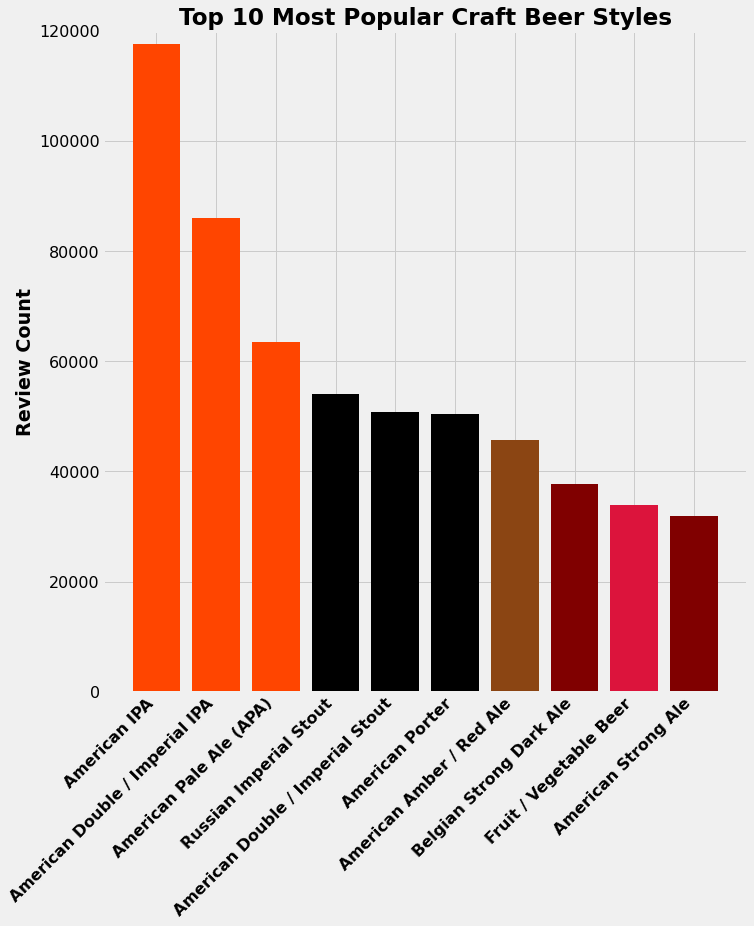

In [60]:
fig, ax = plt.subplots(figsize=(10,10))    
fig.tight_layout()

# data
x_data = np.arange(10)
y_data = bsdf_t20.loc[:9, 'beer_style_review_count']
mean_review_count = bsdf_t20['beer_style_review_count'].mean()

# plotting
bar_colors = ['orangered', 'orangered', 'orangered', 'k', 'k', 'k', 'saddlebrown', 'maroon', 'crimson', 'maroon']
ax.bar(x_data, y_data, color=bar_colors)

ax.set_title("Top 10 Most Popular Craft Beer Styles", fontweight="bold") 
# ax.set_xlabel("Beer Style")
ax.set_ylabel("Review Count", fontweight="bold")
ax.set_ylim(0, 120000)

# Make the ticks at the center of the bar using:
#   center = left_edge + 0.5*width
ax.set_xticks(x_data)
ax.set_xticklabels(bsdf_t20.loc[:9, 'beer_style'], rotation = 45, ha="right", fontweight='bold');

### Scatter Plot of Review Counts vs. Mean Rating

(0.0, 5.0)

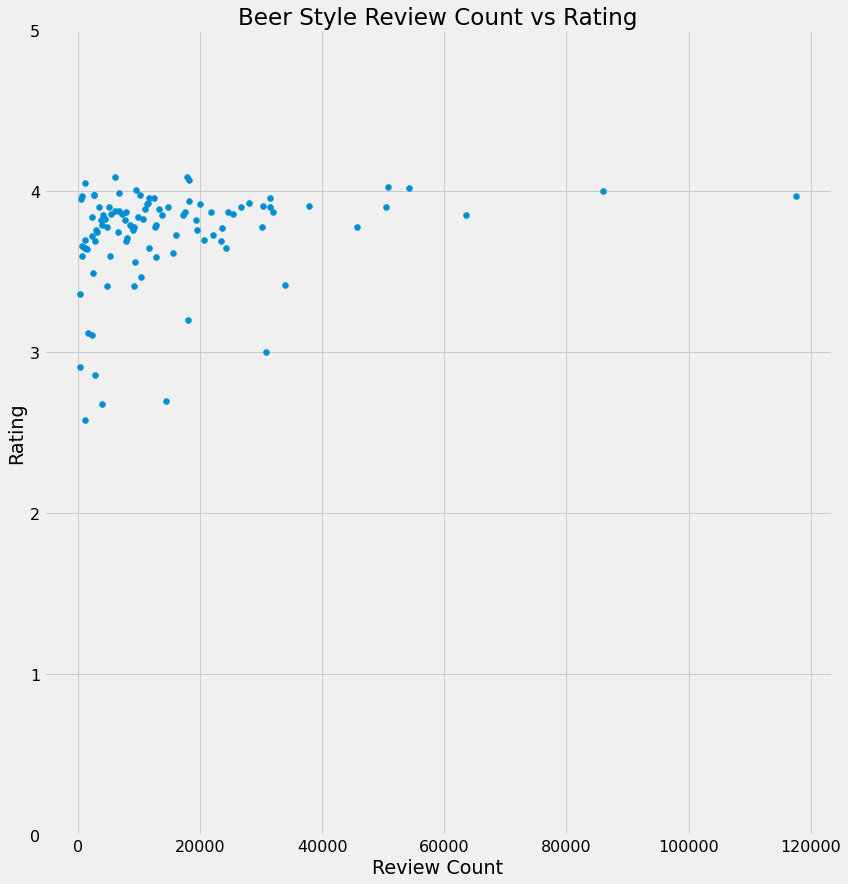

In [49]:
# basic setup - Don't forget imports, style, and master font size/family.
fig, ax = plt.subplots(figsize=(12,12))    
fig.tight_layout()

# data
x_data = bsdf_t20['beer_style_review_count']
y_data = bsdf_t20['review_overall_mean']
mean_rating = bsdf_t20['review_overall_mean'].mean()
mean_review_count = bsdf_t20['beer_style_review_count'].mean()

# plotting
ax.scatter(x_data, y_data)

ax.set_title("Beer Style Review Count vs Rating") 
ax.set_xlabel("Review Count")
ax.set_ylabel("Rating")
ax.set_ylim(0, 5)

### Top 10 by Mean Rating
* Only beers in top 50% of review count (~10000 reviews)

In [81]:
bsdf_t20['beer_style_review_count'].quantile(0.50)

9978.0

In [83]:
bsdf_mean_sort = bsdf_t20[bsdf_t20['beer_style_review_count'] > 10000]
bsdf_mean_sort = bsdf_mean_sort.sort_values('review_overall_mean', ascending=False)
bsdf_mean_sort.reset_index(inplace=True)
bsdf_mean_sort.drop('index', axis=1, inplace=True)
bsdf_mean_sort.head(12)

,beer_style,beer_style_review_count,review_overall_mean,review_overall_std,review_overall_rank,review_overall_percentile
0,American Wild Ale,17794,4.09,0.65,2,98
1,Quadrupel (Quad),18086,4.07,0.63,3,97
2,American Double / Imperial Stout,50705,4.03,0.67,5,95
3,Russian Imperial Stout,54129,4.02,0.64,6,94
4,American Double / Imperial IPA,85977,4.00,0.64,8,92
5,Rye Beer,10130,3.98,0.59,12,88
6,American IPA,117586,3.97,0.61,14,87
7,Saison / Farmhouse Ale,31480,3.96,0.62,17,84
8,Baltic Porter,11572,3.96,0.59,17,84
9,Belgian IPA,12471,3.96,0.57,17,84


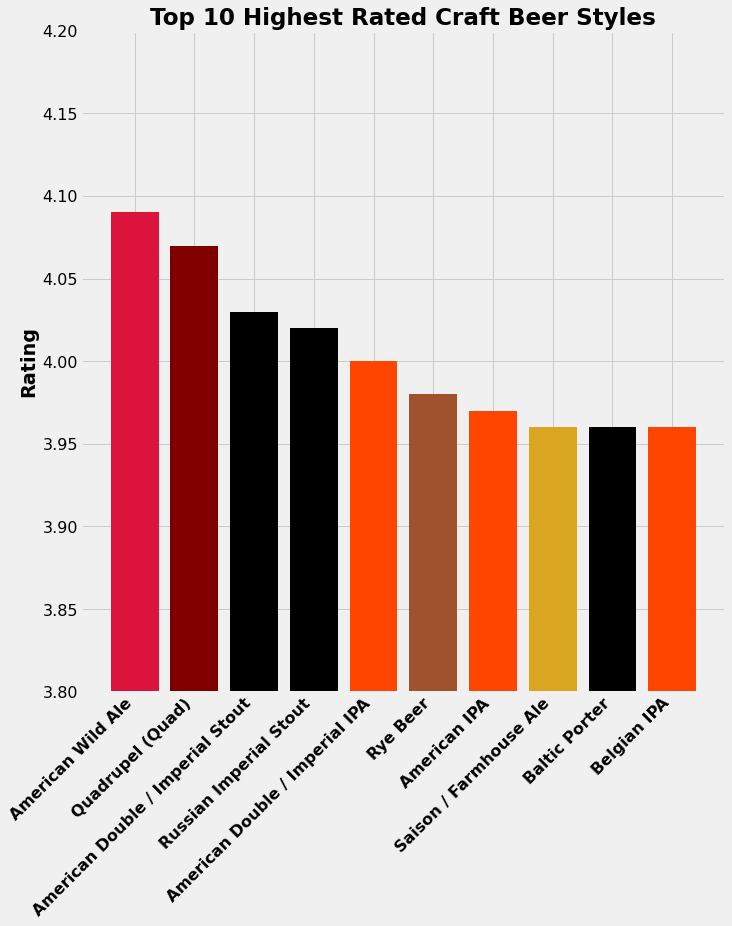

In [89]:
fig, ax = plt.subplots(figsize=(10,10))    
fig.tight_layout()

# data
x_data = np.arange(10)
y_data = bsdf_mean_sort.loc[:9, 'review_overall_mean']
mean_review_count = bsdf_mean_sort['beer_style_review_count'].mean()

# plotting
bar_colors = ['crimson', 'maroon', 'k', 'k', 'orangered', 'sienna', 'orangered', 'goldenrod', 'k', 'orangered']
ax.bar(x_data, y_data, color=bar_colors)

ax.set_title("Top 10 Highest Rated Craft Beer Styles", fontweight="bold") 
# ax.set_xlabel("Beer Style")
ax.set_ylabel("Rating", fontweight="bold")
ax.set_ylim(3.8, 4.2)

# Make the ticks at the center of the bar using:
#   center = left_edge + 0.5*width
ax.set_xticks(x_data)
ax.set_xticklabels(bsdf_mean_sort.loc[:9, 'beer_style'], rotation = 45, ha="right", fontweight='bold');

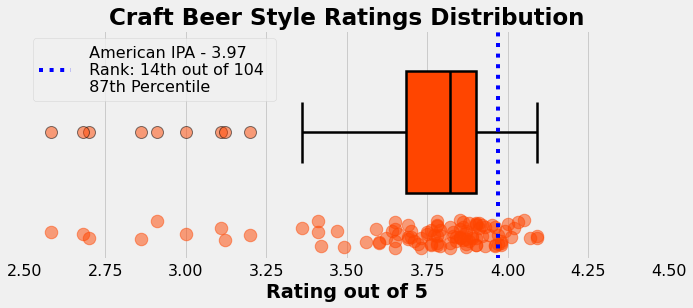

In [171]:
fig, ax = plt.subplots(figsize=(10,4))    
fig.tight_layout()

# data
x_data = bsdf_t20['review_overall_mean'] 
# y_data = bsdf_mean_sort.loc[:9, 'review_overall_mean']
# mean_review_count = bsdf_mean_sort['beer_style_review_count'].mean()

# plotting
ax.boxplot(x_data, vert=False, widths=.6, patch_artist=True,
            flierprops = dict(marker='o', markerfacecolor='orangered', markersize=12, linestyle='none', alpha=.5),
            medianprops = dict(linestyle='-', linewidth=2.5, color='k'),
            whiskerprops = dict(linestyle='-', linewidth=2.5, color='k'), 
            capprops = dict(linestyle='-', linewidth=2.5, color='k'), 
            boxprops = dict(linestyle='-', linewidth=2.5, color='k', facecolor='orangered'))
y = np.random.uniform(-0.07, 0.07, size=len(x_data))
ax.plot(x_data, .5+y, marker='.', color='orangered', linestyle='', alpha=0.5, markersize=25)
ax.axvline(x=3.97, ymin=0, ymax=1, linestyle=':', color='b', label=' American IPA - 3.97 \n Rank: 14th out of 104 \n 87th Percentile')

ax.set_title("Craft Beer Style Ratings Distribution", fontweight="bold") 
ax.set_xlabel('Rating out of 5', fontweight='bold')
ax.set_yticks([0])
ax.set_xlim(2.5,4.5)
ax.legend(loc='upper left')
# ax.set_xticklabels(bsdf_mean_sort.loc[:9, 'beer_style'], rotation = 45, ha="right", fontweight='bold');

# Percentiles and Rank 

In [25]:
bsdf_t20

,beer_style,beer_style_review_count,review_overall_mean,review_overall_std
0,American IPA,117586,3.97,0.61
1,American Double / Imperial IPA,85977,4.00,0.64
2,American Pale Ale (APA),63469,3.85,0.66
3,Russian Imperial Stout,54129,4.02,0.64
4,American Double / Imperial Stout,50705,4.03,0.67
...,...,...,...,...
99,Gose,686,3.97,0.62
100,Faro,609,3.60,0.76
101,Roggenbier,466,3.95,0.53
102,Kvass,297,3.36,0.96


In [35]:
bsdf_t20['review_overall_rank'] = bsdf_t20['review_overall_mean'].rank(axis=0, method='min', ascending=False)
bsdf_t20['review_overall_rank'] = bsdf_t20['review_overall_rank'].astype(int)
bsdf_t20

,beer_style,beer_style_review_count,review_overall_mean,review_overall_std,review_overall_rank
0,American IPA,117586,3.97,0.61,14
1,American Double / Imperial IPA,85977,4.00,0.64,8
2,American Pale Ale (APA),63469,3.85,0.66,47
3,Russian Imperial Stout,54129,4.02,0.64,6
4,American Double / Imperial Stout,50705,4.03,0.67,5
...,...,...,...,...,...
99,Gose,686,3.97,0.62,14
100,Faro,609,3.60,0.76,87
101,Roggenbier,466,3.95,0.53,18
102,Kvass,297,3.36,0.96,95


In [41]:
bsdf_t20['review_overall_percentile'] = ((1 - bsdf_t20['review_overall_mean'].rank(axis=0, method='max', ascending=False, pct=True).round(2))*100).astype(int)
bsdf_t20

,beer_style,beer_style_review_count,review_overall_mean,review_overall_std,review_overall_rank,review_overall_percentile
0,American IPA,117586,3.97,0.61,14,87
1,American Double / Imperial IPA,85977,4.00,0.64,8,92
2,American Pale Ale (APA),63469,3.85,0.66,47,55
3,Russian Imperial Stout,54129,4.02,0.64,6,94
4,American Double / Imperial Stout,50705,4.03,0.67,5,95
...,...,...,...,...,...,...
99,Gose,686,3.97,0.62,14,87
100,Faro,609,3.60,0.76,87,16
101,Roggenbier,466,3.95,0.53,18,83
102,Kvass,297,3.36,0.96,95,8
